## DRUG MAY INJECT TO PATIENT DEPENDING ON THEIR MEDICAL CONDITION PREDICTOR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pxt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# We are using the dataset drug200.csv  here 
# to build a model to find out which drug might be appropriate for a future patient with the same illness.
#The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients,
#and the target is the drug that each patient responded to.
df=pd.read_csv('drug200.csv')

In [3]:
df.head()  # Na_to_K is the sodium and pottasium

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lbl=LabelEncoder()

In [6]:
df['Drug']=lbl.fit_transform(df['Drug'])

# Below code show us the which numeric data assign to which textual data 
label_mapping_drug = dict(zip(lbl.classes_, lbl.transform(lbl.classes_)))
print(label_mapping_drug)

{'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}


In [7]:
# Seperating the input and the target column
X=df.iloc[:,0:5]  
y=df.iloc[:,-1]

In [8]:
df.head() # 4 is drugY 2 is drugC 3 is drugX 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4


In [9]:
# Transforming textual data column into the numeric one because our ml models predict on the basis of mathematical calculation.
X['Sex']=lbl.fit_transform(X['Sex'])   

label_mapping_sex = dict(zip(lbl.classes_, lbl.transform(lbl.classes_)))
print('For Column Sex', label_mapping_sex)

X['BP']=lbl.fit_transform(X['BP'])

label_mapping_bp= dict(zip(lbl.classes_, lbl.transform(lbl.classes_)))
print('For Column BP', label_mapping_bp)

X['Cholesterol']=lbl.fit_transform(X['Cholesterol'])

label_mapping_chol = dict(zip(lbl.classes_, lbl.transform(lbl.classes_)))
print('For Column Cholesterol',label_mapping_chol)

For Column Sex {'F': 0, 'M': 1}
For Column BP {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
For Column Cholesterol {'HIGH': 0, 'NORMAL': 1}


In [10]:
X.head()    

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=22)

In [13]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [14]:
dtc=DecisionTreeClassifier()

In [15]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=dtc.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_pred,y_test)

0.975

In [19]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [20]:
dtc.predict([[61,0,1,0,18.04]])  # It Predict which drug is better to inject 


 # Drug:-      {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}
   # Sex :-            {'F': 0, 'M': 1}
    # BP:-              {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}
    # Cholesterol:-       {'HIGH': 0, 'NORMAL': 1}


array([4])

In [21]:
from sklearn.tree import plot_tree

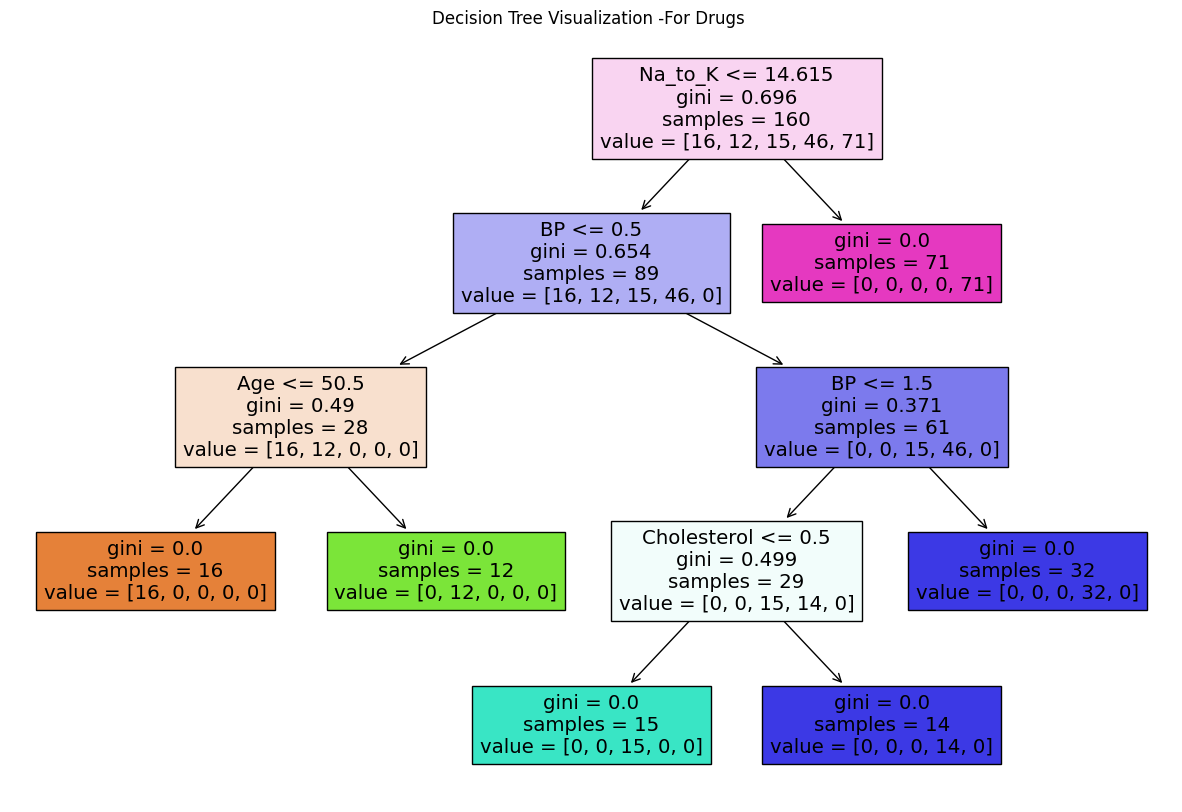

In [22]:
plt.figure(figsize=(15, 10))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization -For Drugs ")
plt.show()